In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr


In [16]:
# Task 4: Summative Analysis of SA2 Well-Resourced Scores

#This report analyses how well-resourced different SA2 regions in Greater Sydney are, based on an integrated scoring metric derived from transport stops, points of interest, and other spatial features. We highlight top/bottom performers, examine score distributions, explore regional differences, and check for correlations with income.


In [20]:
df = pd.read_csv("sa2_scores_north_sydney.csv")  # Update file name as needed
df.head()


,sa2_code21,sa2_name21,z_num_stops,z_num_pois,z_sum,final_score
0,117011320,Banksmeadow,-1.288786,-0.579163,-1.867949,0.133779
1,117011321,Botany,-0.642868,-0.579163,-1.222031,0.227579
2,117011323,Pagewood - Hillsdale - Daceyville,-0.449093,-0.579163,-1.028256,0.263422
3,117011634,Eastlakes,-0.681623,-0.579163,-1.260786,0.220839
4,117011635,Mascot,-0.410337,-0.579163,-0.989501,0.271011


In [22]:
df['final_score'].describe()


count    72.000000
mean      0.448605
std       0.287573
min       0.125049
25%       0.229288
50%       0.312979
75%       0.678171
max       0.998621
Name: final_score, dtype: float64

In [26]:
top_5 = df[['sa2_name21', 'final_score']].sort_values(by="final_score", ascending=False).head(5)
bottom_5 = df[['sa2_name21', 'final_score']].sort_values(by="final_score", ascending=True).head(5)

print("Top 5 SA2 Regions")
display(top_5)

print("\nBottom 5 SA2 Regions")
display(bottom_5)


Top 5 SA2 Regions


,sa2_name21,final_score
64,Turramurra,0.998621
61,Lindfield - Roseville,0.988733
54,Asquith - Mount Colah,0.982724
65,Wahroonga (East) - Warrawee,0.974518
51,Greenwich - Riverview,0.973536



Bottom 5 SA2 Regions


,sa2_name21,final_score
15,Chippendale,0.125049
0,Banksmeadow,0.133779
22,Ultimo,0.143019
24,Zetland,0.154464
32,Annandale (NSW),0.170266


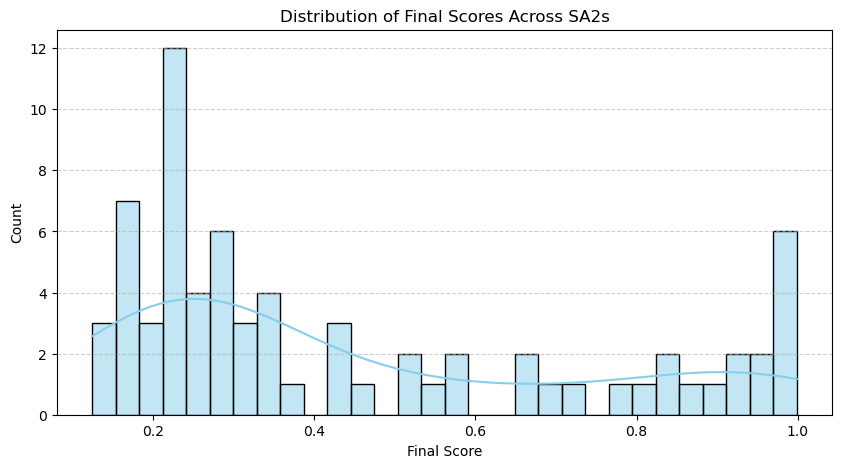

In [28]:
plt.figure(figsize=(10, 5))
sns.histplot(df['final_score'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Final Scores Across SA2s")
plt.xlabel("Final Score")
plt.ylabel("Count")
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()


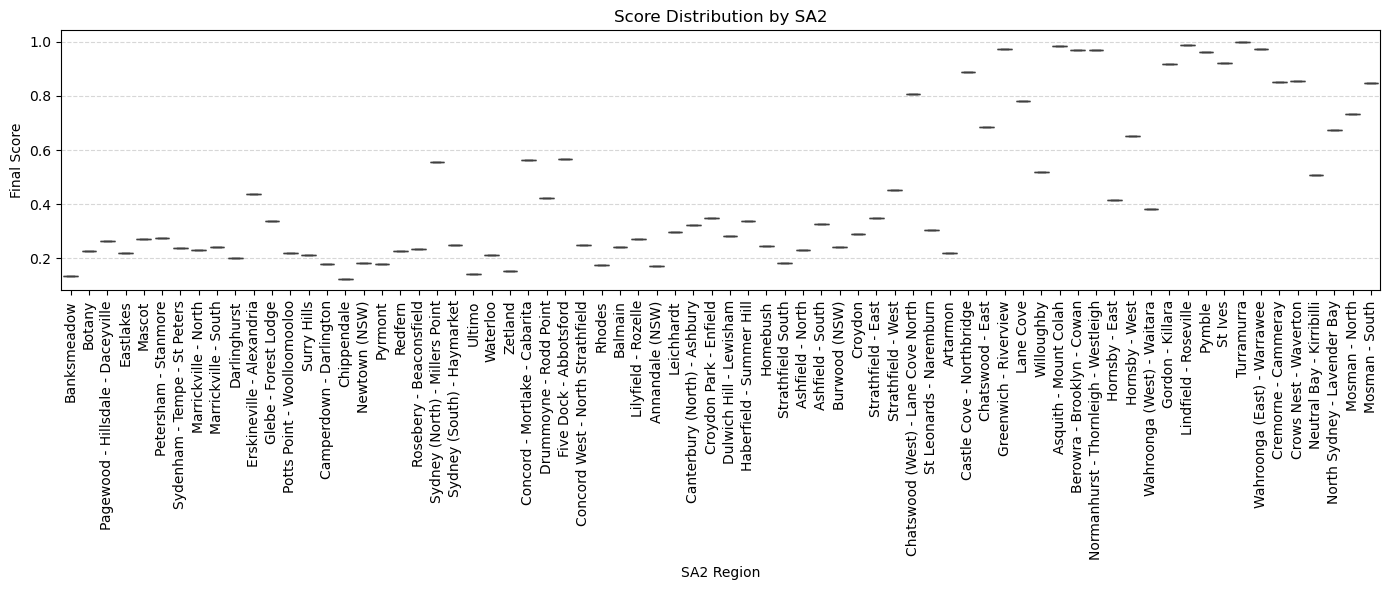

In [32]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='sa2_name21', y='final_score')
plt.xticks(rotation=90)
plt.title("Score Distribution by SA2")
plt.xlabel("SA2 Region")
plt.ylabel("Final Score")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [34]:
# Ensure 'median_income' column is in the dataset
if 'median_income' in df.columns:
    corr, p_val = pearsonr(df['final_score'], df['median_income'])
    print(f"Pearson correlation between final score and median income: {corr:.3f} (p = {p_val:.3f})")

    plt.figure(figsize=(8, 5))
    sns.regplot(data=df, x='median_income', y='final_score', scatter_kws={'alpha':0.6})
    plt.title("Correlation Between Median Income and Final Score")
    plt.xlabel("Median Income ($AUD)")
    plt.ylabel("Final Score")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()
else:
    print("Column 'median_income' not found in dataset.")


Column 'median_income' not found in dataset.


In [38]:
# Example if you used z-scores to compute final score
z_score_cols = ['z_num_stops', 'z_num_pois', 'z_sum']  # Replace with actual column names
df[z_score_cols + ['final_score']].corr()['final_score'].sort_values(ascending=False)


final_score    1.000000
z_sum          0.957782
z_num_stops    0.903642
z_num_pois     0.843993
Name: final_score, dtype: float64